In [1]:
import numpy as np
import h5py
import pickle
import sys
import os
import matplotlib.pyplot as plt

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import src.models as models 

In [2]:

with h5py.File("scaling_params_regressorV3.h5", "r") as f:
    
    seed_vec_base = f['results/seed'][:]
    hidden_vec_base = f['results/hidden'][:]
    loss_net_vec_base = f['results/loss_net'][:]
    loss_proj_vec_base = f['results/loss_proj'][:]
    pickled_config_base = f['results/config'][()]
    constant_net = f['results/constant_net'][:]
    constant_proj = f['results/constant_proj'][:]

config = pickle.loads(pickled_config_base)


unique_hidden_base = np.unique(hidden_vec_base)
loss_net_base_dict = {ele: [] for ele in unique_hidden_base}
loss_proj_base_dict = {ele: [] for ele in unique_hidden_base}

const_net_base_dict = {ele: [] for ele in unique_hidden_base}
const_proj_base_dict = {ele: [] for ele in unique_hidden_base}


for i in range(len(seed_vec_base)):
    
    loss_net_base_dict[hidden_vec_base[i]].append(loss_net_vec_base[i])
    loss_proj_base_dict[hidden_vec_base[i]].append(loss_proj_vec_base[i])
    
    const_net_base_dict[hidden_vec_base[i]].append(constant_net[i])
    const_proj_base_dict[hidden_vec_base[i]].append(constant_proj[i])


rmse_net_base_dict = {}
for i, (size, vec) in enumerate(loss_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_net_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse_const_base_dict = {}
for i, (size, vec) in enumerate(const_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_const_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse_proj_base_dict = {}
for i, (size, vec) in enumerate(loss_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse_const_proj_base_dict = {}
for i, (size, vec) in enumerate(const_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_const_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

In [3]:
print(rmse_const_proj_base_dict)
print(rmse_const_base_dict)

{np.int64(50): (np.float64(6.609122132234828e-12), np.float64(1.4043262627763147e-12)), np.int64(65): (np.float64(8.347253093424605e-12), np.float64(1.3501009895185501e-12)), np.int64(80): (np.float64(7.873738423608233e-12), np.float64(2.088491155812291e-12)), np.int64(95): (np.float64(8.605269220630553e-12), np.float64(2.0602658040905152e-12)), np.int64(110): (np.float64(8.843775302974251e-12), np.float64(2.2881402542338385e-12)), np.int64(135): (np.float64(1.009727765533754e-11), np.float64(9.233903501361845e-13)), np.int64(160): (np.float64(8.481703155857631e-12), np.float64(1.7557620726165523e-12)), np.int64(180): (np.float64(9.235171080314969e-12), np.float64(1.8498591089908553e-12)), np.int64(200): (np.float64(9.544298745415987e-12), np.float64(1.7943344858327824e-12))}
{np.int64(50): (np.float64(0.06043810907889472), np.float64(0.017219407129207803)), np.int64(65): (np.float64(0.048886452820007475), np.float64(0.008872368755286209)), np.int64(80): (np.float64(0.04727613922308414

In [4]:

with h5py.File("scaling_params_pcdae_sine_V3.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    hidden_vec_pcdae = f['results/hidden'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_refine1'][:]
    loss_refine2_pcdae = f['results/loss_refine2'][:]
    const_refine1_pcdae = f['results/constant_T'][:]
    const_refine2_pcdae = f['results/constant_Tadapt'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(hidden_vec_pcdae)
loss1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}

const1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
const2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss1_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine1_pcdae[i])
    loss2_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine2_pcdae[i])
    
    const1_pcdae_dict[hidden_vec_pcdae[i]].append(const_refine1_pcdae[i])
    const2_pcdae_dict[hidden_vec_pcdae[i]].append(const_refine2_pcdae[i])


rmse1_pcdae_dict = {}
for i, (size, vec) in enumerate(loss1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse1_const_pcdae_dict = {}
for i, (size, vec) in enumerate(const1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_const_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_const_pcdae_dict = {}
for i, (size, vec) in enumerate(const2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_const_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    


In [5]:
print(rmse2_const_pcdae_dict)
print(rmse1_const_pcdae_dict)

{np.int64(25): (np.float32(0.0287366), np.float32(0.004630388)), np.int64(35): (np.float32(0.024483234), np.float32(0.0053189304)), np.int64(47): (np.float32(0.025402289), np.float32(0.009435329)), np.int64(58): (np.float32(0.024039937), np.float32(0.0054798233)), np.int64(68): (np.float32(0.025458064), np.float32(0.007193824)), np.int64(85): (np.float32(0.023424791), np.float32(0.009645287))}
{np.int64(25): (np.float32(0.028736463), np.float32(0.004630562)), np.int64(35): (np.float32(0.024483263), np.float32(0.005318999)), np.int64(47): (np.float32(0.025402388), np.float32(0.009435266)), np.int64(58): (np.float32(0.024039991), np.float32(0.0054799346)), np.int64(68): (np.float32(0.025458083), np.float32(0.0071938043)), np.int64(85): (np.float32(0.023424694), np.float32(0.0096451705))}


In [6]:
print(rmse1_pcdae_dict)
print(rmse2_pcdae_dict)
print(const1_pcdae_dict)
print(const2_pcdae_dict)

{np.int64(25): (np.float64(0.03612873699682305), np.float64(0.010811485079508519)), np.int64(35): (np.float64(0.03174464750619079), np.float64(0.009055885777926424)), np.int64(47): (np.float64(0.030564632331077618), np.float64(0.014254637506942173)), np.int64(58): (np.float64(0.03209503615158658), np.float64(0.015216601221156265)), np.int64(68): (np.float64(0.034434983214506026), np.float64(0.01615887124252019)), np.int64(85): (np.float64(0.033302088817007566), np.float64(0.015315161999187095))}
{np.int64(25): (np.float64(0.0361287949028705), np.float64(0.01081120962418883)), np.int64(35): (np.float64(0.031744745161018426), np.float64(0.00905585945371348)), np.int64(47): (np.float64(0.030564724782304674), np.float64(0.014254760876527174)), np.int64(58): (np.float64(0.03209609342613555), np.float64(0.015218200661220942)), np.int64(68): (np.float64(0.034434900513789654), np.float64(0.016158983480059917)), np.int64(85): (np.float64(0.033301813286569955), np.float64(0.015315637251369574))}

In [7]:
with h5py.File("scaling_params_ebm_pcdae_sine_V3.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    hidden_vec_pcdae = f['results/hidden'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine_ebm_pcdae = f['results/loss_T'][:]
    loss_refine2_ebm_pcdae = f['results/loss_Tadapt'][:]
    const_refine_ebm_pcdae = f['results/constant_T'][:]
    const_refine2_ebm_pcdae = f['results/constant_Tadapt'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(hidden_vec_pcdae)
loss_ebm_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss_ebm2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
const_ebm_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
const_ebm2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss_ebm_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine_ebm_pcdae[i])
    loss_ebm2_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine2_ebm_pcdae[i])
    const_ebm_pcdae_dict[hidden_vec_pcdae[i]].append(const_refine_ebm_pcdae[i])
    const_ebm2_pcdae_dict[hidden_vec_pcdae[i]].append(const_refine2_ebm_pcdae[i])


rmse_ebm_pcdae_dict = {}
for i, (size, vec) in enumerate(loss_ebm_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_ebm_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse_const_ebm_pcdae_dict = {}
for i, (size, vec) in enumerate(const_ebm_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_const_ebm_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

rmse_ebm2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss_ebm2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_ebm2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse_const_ebm2_pcdae_dict = {}
for i, (size, vec) in enumerate(const_ebm2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_const_ebm2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


In [8]:

# print(rmse1_pcdae_dict)
print(rmse_ebm_pcdae_dict)
print(rmse_ebm2_pcdae_dict)
print(rmse_const_ebm_pcdae_dict)
print(rmse_const_ebm2_pcdae_dict)

{np.int64(25): (np.float64(0.033677798227935055), np.float64(0.012515932617185593)), np.int64(35): (np.float64(0.028518022400705743), np.float64(0.008804063341750707)), np.int64(47): (np.float64(0.030034411888305156), np.float64(0.013547075733909595)), np.int64(58): (np.float64(0.03147422119445789), np.float64(0.012519922303331082)), np.int64(68): (np.float64(0.0331044327307234), np.float64(0.01548794219255951)), np.int64(85): (np.float64(0.032961908630057324), np.float64(0.014421165196762705))}
{np.int64(25): (np.float64(0.03358648662824531), np.float64(0.01247146551536012)), np.int64(35): (np.float64(0.028570309146145872), np.float64(0.008830859447775804)), np.int64(47): (np.float64(0.02995264143408823), np.float64(0.013626086038187832)), np.int64(58): (np.float64(0.03151372833203713), np.float64(0.012465881726019553)), np.int64(68): (np.float64(0.03317919826546488), np.float64(0.015572124926538115)), np.int64(85): (np.float64(0.03301443689458133), np.float64(0.014331494664998461))}


In [9]:
# {25: (0.03892328244711214, 0.012761811057688288), 35: (0.03209940911568902, 0.011635751777223721), 47: (0.030230900676482424, 0.011297122537077372), 58: (0.03237109134331768, 0.014711895105571646), 68: (0.033561320069798714, 0.015360580491637054), 85: (0.03432773354508564, 0.016583365783693158)}
# {25: (0.03645028776376201, 0.015570964785782074), 35: (0.029720995114591486, 0.010124212226252895), 47: (0.032365060774387444, 0.014800318191074057), 58: (0.030925890463342053, 0.01381257177405546), 68: (0.03538006023759406, 0.01840676841551432), 85: (0.033029740666300315, 0.014671696845790286)}

In [10]:
### parameters count regressor

input_size = 3
output_size = 17

parameters_base = []
rmse_net_mean_base = []
rmse_net_std_base = []
rmse_proj_mean_base = []
rmse_proj_std_base = []

const_net_base = []
const_proj_base = []

for size in unique_hidden_base[:-3]:
    
    if size == 80:
        continue
    
    hidden_sizes = [size, size]
    model_loaded = models.Regressor(input_size=input_size, output_size=output_size, hidden_sizes=hidden_sizes)
    params = models.count_parameters(model_loaded)
    
    parameters_base.append(params)
    mean, std = rmse_net_base_dict[size]
    rmse_net_mean_base.append(mean)
    rmse_net_std_base.append(std)
    
    mean, std = rmse_proj_base_dict[size]
    rmse_proj_mean_base.append(mean)
    rmse_proj_std_base.append(std)
    
    mean, _ = rmse_const_base_dict[size]
    const_net_base.append(mean)
    
    mean, _ = rmse_const_proj_base_dict[size]
    const_proj_base.append(mean)
    

rmse_net_mean_base = np.array(rmse_net_mean_base)
rmse_net_std_base = np.array(rmse_net_std_base)

const_net_base = np.array(const_net_base)

rmse_proj_mean_base = np.array(rmse_proj_mean_base)
rmse_proj_std_base = np.array(rmse_proj_std_base)

const_proj_base = np.array(const_proj_base)

input_size = 3
output_size = 17


parameters_pcdae = []
rmse1_mean_pcdae = []
rmse1_std_pcdae = []
rmse2_mean_pcdae = []
rmse2_std_pcdae = []

const_pcdae1 = []
const_pcdae2 = []

rmse1_mean_ebm_pcdae = []
rmse1_std_ebm_pcdae = []
rmse2_mean_ebm_pcdae = []
rmse2_std_ebm_pcdae = []

const_ebm1 = []
const_ebm2 = []


for size in unique_hidden_pcdae:
    hidden_dim = size
    model_loaded = models.PCDAE(x_dim=input_size, y_dim=output_size, hidden_dim=size)
    params = models.count_parameters(model_loaded)
    
    parameters_pcdae.append(params)
    mean, std = rmse1_pcdae_dict[size]
    rmse1_mean_pcdae.append(mean)
    rmse1_std_pcdae.append(std)
    
    mean, std = rmse2_pcdae_dict[size]
    rmse2_mean_pcdae.append(mean)
    rmse2_std_pcdae.append(std)
    
    mean, _ = rmse1_const_pcdae_dict[size]
    const_pcdae1.append(mean)
    
    mean, _ = rmse2_const_pcdae_dict[size]
    const_pcdae2.append(mean)
    
    mean, std = rmse_ebm_pcdae_dict[size]
    rmse1_mean_ebm_pcdae.append(mean)
    rmse1_std_ebm_pcdae.append(std)
    
    mean, std = rmse_ebm2_pcdae_dict[size]
    rmse2_mean_ebm_pcdae.append(mean)
    rmse2_std_ebm_pcdae.append(std)
    
    mean, _ = rmse_const_ebm_pcdae_dict[size]
    const_ebm1.append(mean)
    
    mean, _ = rmse_const_ebm2_pcdae_dict[size]
    const_ebm2.append(mean)


rmse1_mean_pcdae = np.array(rmse1_mean_pcdae)
rmse2_mean_pcdae = np.array(rmse2_mean_pcdae)

rmse1_std_pcdae = np.array(rmse1_std_pcdae)
rmse2_std_pcdae = np.array(rmse2_std_pcdae)

rmse1_mean_ebm_pcdae = np.array(rmse1_mean_ebm_pcdae)
rmse1_std_ebm_pcdae = np.array(rmse1_std_ebm_pcdae)

rmse2_mean_ebm_pcdae = np.array(rmse2_mean_ebm_pcdae)
rmse2_std_ebm_pcdae = np.array(rmse2_std_ebm_pcdae)

const_ebm1 = np.array(const_ebm1)
const_ebm2 = np.array(const_ebm2)

const_pcdae1 = np.array(const_pcdae1)
const_pcdae2 = np.array(const_pcdae2)


In [11]:
print(const_ebm_pcdae_dict[25])

[np.float32(0.0009898903), np.float32(0.0032215528), np.float32(0.00079049356), np.float32(0.0007207512), np.float32(0.002824055), np.float32(0.0010868505), np.float32(0.00055055314), np.float32(0.0003524229), np.float32(0.0020351948), np.float32(0.0007939727)]


In [12]:
# print(rmse_net_mean_base)
# print(rmse_proj_mean_base)
# print(rmse_net_std_base)
# print(rmse_net_std_base)

In [13]:

### ebm sizes
hidden_sizes = [25, 35, 47, 58, 68, 85]
x_dim = 3
y_dim = 17

ebm_params_vec = []

for i in range(len(hidden_sizes)):
    pcdae_ebm = models.PCDAE_EBM(x_dim=x_dim, y_dim=y_dim, hidden_dim=hidden_sizes[i])
    params_size = models.count_parameters(pcdae_ebm)
    ebm_params_vec.append(params_size)


ebm_params_arr = np.array(ebm_params_vec)


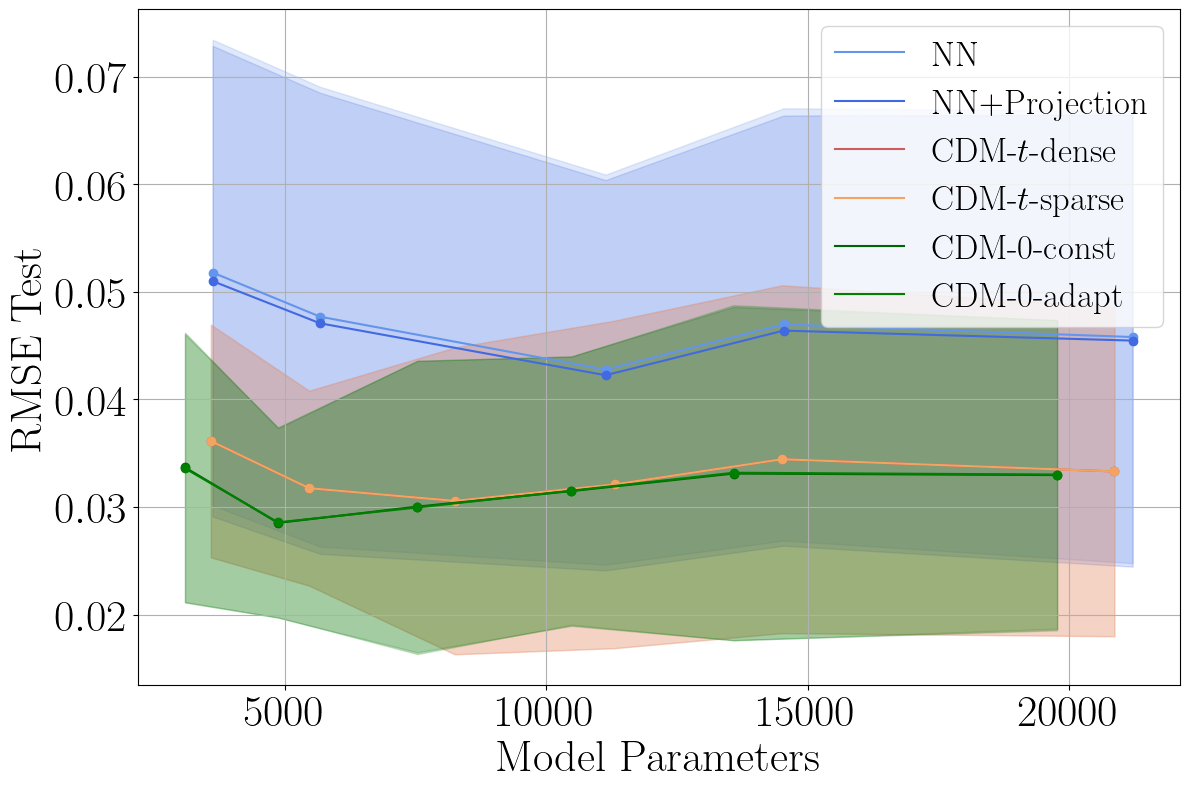

In [16]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

NN_color = "cornflowerblue"
NN_Proj_color = "royalblue"

EBM1_color = "darkgreen"
EBM2_color = "mediumseagreen"

CDM1_color = "indianred"
CDM2_color = "sandybrown"

plt.plot(parameters_base, rmse_net_mean_base, label="NN", color=NN_color)
plt.plot(parameters_base, rmse_net_mean_base, 'o', color=NN_color)
plt.fill_between(parameters_base,
                    rmse_net_mean_base - rmse_net_std_base,
                    rmse_net_mean_base + rmse_net_std_base,
                    alpha=0.2, color=NN_color)


plt.plot(parameters_base, rmse_proj_mean_base, label="NN+Projection", color=NN_Proj_color)
plt.plot(parameters_base, rmse_proj_mean_base, 'o', color=NN_Proj_color)
plt.fill_between(parameters_base,
                    rmse_proj_mean_base - rmse_proj_std_base,
                    rmse_proj_mean_base + rmse_proj_std_base,
                    alpha=0.2, color=NN_Proj_color)


plt.plot(parameters_pcdae, rmse1_mean_pcdae, label=r"CDM-$t$-dense", color=CDM1_color)
plt.plot(parameters_pcdae, rmse1_mean_pcdae, 'o', color=CDM1_color)
plt.fill_between(parameters_pcdae,
                    rmse1_mean_pcdae - rmse1_std_pcdae,
                    rmse1_mean_pcdae + rmse1_std_pcdae,
                    alpha=0.2, color=CDM1_color)

plt.plot(parameters_pcdae, rmse1_mean_pcdae, label=r"CDM-$t$-sparse", color=CDM2_color)
plt.plot(parameters_pcdae, rmse1_mean_pcdae, 'o', color=CDM2_color)
plt.fill_between(parameters_pcdae,
                    rmse1_mean_pcdae - rmse1_std_pcdae,
                    rmse1_mean_pcdae + rmse1_std_pcdae,
                    alpha=0.2, color=CDM2_color)


plt.plot(ebm_params_arr, rmse1_mean_ebm_pcdae, label="CDM-$0$-const", color=EBM1_color)
plt.plot(ebm_params_arr, rmse1_mean_ebm_pcdae, 'o', color=EBM1_color)
plt.fill_between(ebm_params_arr,
                    rmse1_mean_ebm_pcdae - rmse1_std_ebm_pcdae,
                    rmse1_mean_ebm_pcdae + rmse1_std_ebm_pcdae,
                    alpha=0.2, color=EBM1_color)

plt.plot(ebm_params_arr, rmse2_mean_ebm_pcdae, label="CDM-$0$-adapt", color="green")
plt.plot(ebm_params_arr, rmse2_mean_ebm_pcdae, 'o', color="green")
plt.fill_between(ebm_params_arr,
                    rmse2_mean_ebm_pcdae - rmse2_std_ebm_pcdae,
                    rmse2_mean_ebm_pcdae + rmse2_std_ebm_pcdae,
                    alpha=0.2, color="green")


plt.xlabel(r'Model Parameters', fontsize=32)
plt.ylabel(r'RMSE Test', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
plt.tight_layout()
plt.grid()
plt.savefig("scaling_params_V3.png")

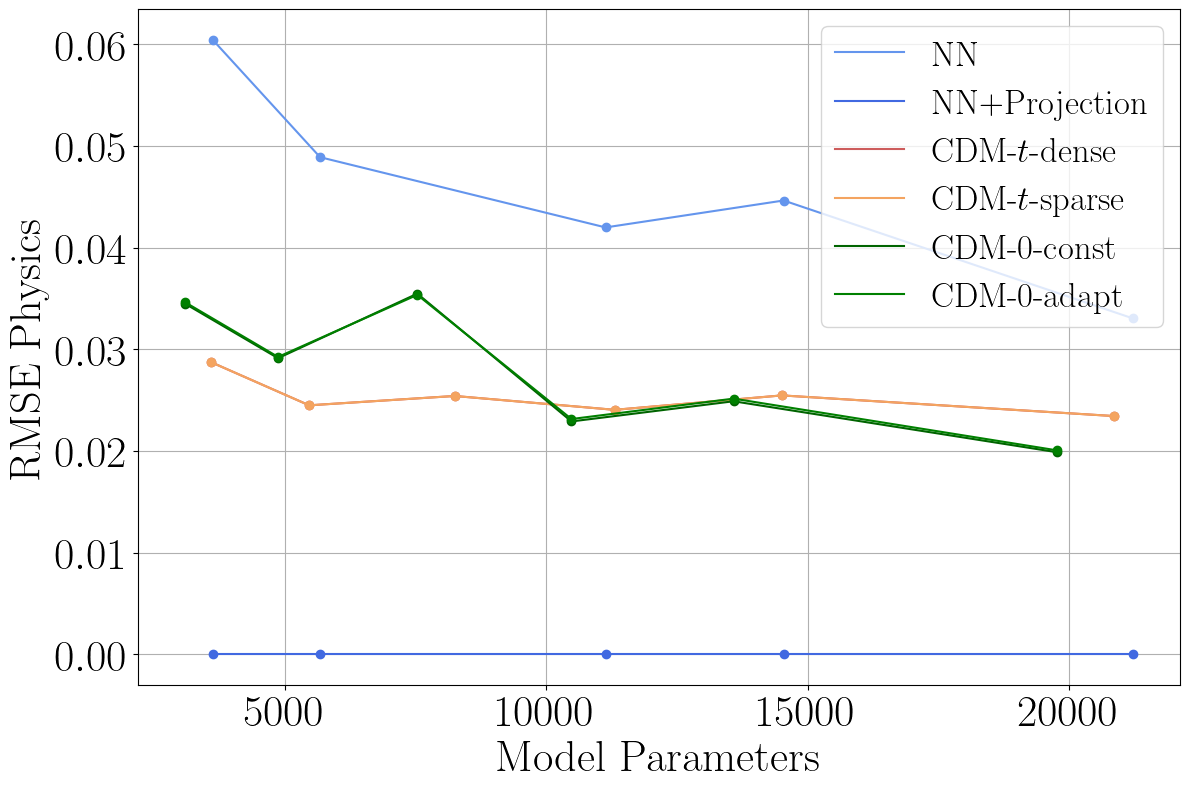

In [15]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

NN_color = "cornflowerblue"
NN_Proj_color = "royalblue"

EBM1_color = "darkgreen"
EBM2_color = "mediumseagreen"

CDM1_color = "indianred"
CDM2_color = "sandybrown"

plt.plot(parameters_base, const_net_base, label="NN", color=NN_color)
plt.plot(parameters_base, const_net_base, 'o', color=NN_color)

plt.plot(parameters_base, const_proj_base, label="NN+Projection", color=NN_Proj_color)
plt.plot(parameters_base, const_proj_base, 'o', color=NN_Proj_color)

plt.plot(parameters_pcdae, const_pcdae1, label=r"CDM-$t$-dense", color=CDM1_color)
plt.plot(parameters_pcdae, const_pcdae1, 'o', color=CDM1_color)

plt.plot(parameters_pcdae, const_pcdae2, label=r"CDM-$t$-sparse", color=CDM2_color)
plt.plot(parameters_pcdae, const_pcdae2, 'o', color=CDM2_color)

plt.plot(ebm_params_arr, const_ebm1, label="CDM-$0$-const", color=EBM1_color)
plt.plot(ebm_params_arr, const_ebm1, 'o', color=EBM1_color)

plt.plot(ebm_params_arr, const_ebm2, label="CDM-$0$-adapt", color="green")
plt.plot(ebm_params_arr, const_ebm2, 'o', color="green")



plt.xlabel(r'Model Parameters', fontsize=32)
plt.ylabel(r'RMSE Physics', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
plt.tight_layout()
plt.grid()
plt.savefig("const_scaling_params_V3.png")